In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx
from pymotif import Motif
import pyvis
from pyvis.network import Network
import matplotlib.pyplot as plt
import pydot

In [2]:
file = pd.read_csv("final_data.csv")
#data = pd.read_csv("client_sentiment.csv")
data = file[["author_id", "created_at", "in_reply_to_user_id", "lang", "hashtags", "sentiment_score", "sentiment_x", "label"]]
data.rename(columns={"sentiment_x" : "sentiment"}, inplace=True)
data

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
0,CrowYusuf,2022-03-08 23:55:57+00:00,0,und,"['IStandWithPutin', 'IStandWithRussia']",0.834725,Positive,bot
1,CrowYusuf,2022-03-08 23:23:55+00:00,0,en,"['IStandWithPutin', 'IStandWithRussia']",0.824678,Positive,bot
2,CrowYusuf,2022-03-07 23:47:57+00:00,0,und,"['FJB', 'LetsGoBrandon', 'IStandWithPutin', 'I...",0.799398,Positive,bot
3,CrowYusuf,2022-03-05 18:02:23+00:00,0,und,"['IStandWithPutin', 'IStandWithRussia', 'FuckN...",0.834725,Positive,bot
4,CrowYusuf,2022-03-04 02:10:54+00:00,0,und,"['FuckGlobalism', 'IStandWithPutin', 'IoStoCon...",0.799398,Positive,bot
...,...,...,...,...,...,...,...,...
224633,DoumDoum19,2022-03-01 16:53:13+00:00,PACMAN88459731,en,"['IStandWithPutin', 'Olosho', 'evenputin']",0.801925,Positive,NaN
224634,XtasyRehman,2022-03-01 16:53:00+00:00,89corrado,en,['istandwithrussia'],0.260121,Negative,NaN
224635,BinduHamal3,2022-03-01 16:51:11+00:00,0,und,['IStandWithPutin'],0.672338,Positive,NaN
224636,RomeoMakgaleme1,2022-03-01 16:44:09+00:00,PrinceChiczo,en,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",0.744688,Positive,NaN


In [3]:
hum = data[data.label=='human']
bo = data[data.label=='bot']
bo

,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
0,CrowYusuf,2022-03-08 23:55:57+00:00,0,und,"['IStandWithPutin', 'IStandWithRussia']",0.834725,Positive,bot
1,CrowYusuf,2022-03-08 23:23:55+00:00,0,en,"['IStandWithPutin', 'IStandWithRussia']",0.824678,Positive,bot
2,CrowYusuf,2022-03-07 23:47:57+00:00,0,und,"['FJB', 'LetsGoBrandon', 'IStandWithPutin', 'I...",0.799398,Positive,bot
3,CrowYusuf,2022-03-05 18:02:23+00:00,0,und,"['IStandWithPutin', 'IStandWithRussia', 'FuckN...",0.834725,Positive,bot
4,CrowYusuf,2022-03-04 02:10:54+00:00,0,und,"['FuckGlobalism', 'IStandWithPutin', 'IoStoCon...",0.799398,Positive,bot
...,...,...,...,...,...,...,...,...
224380,ManojMathers,2022-03-02 03:19:02+00:00,rjsh003,en,[],0.166200,Negative,bot
224381,ManojMathers,2022-03-02 03:18:56+00:00,SeeAndDecide,en,"['NATO', 'UkraineRussiaWar', 'IStandWithPutin'...",0.935011,Positive,bot
224599,dutchxrplink,2022-03-01 18:19:57+00:00,0,en,"['EU', 'Russia', 'USA', 'Ukraine', 'NATO', 'Re...",0.746988,Positive,bot
224614,Akash81299,2022-03-01 17:35:21+00:00,0,en,"['IStandWithPutin', 'istandwithrussia']",0.503075,Neutral,bot


In [4]:
# plt.figure(figsize=(30,20))
# plt.title("Sentiment Distribution")
# plt.hist(data.sentiment_score, density=True, alpha=0.5, bins = 50)
# plt.xlabel("Sentiment")
# plt.ylabel("Frequency")
# plt.savefig('Sentiment Distribution.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


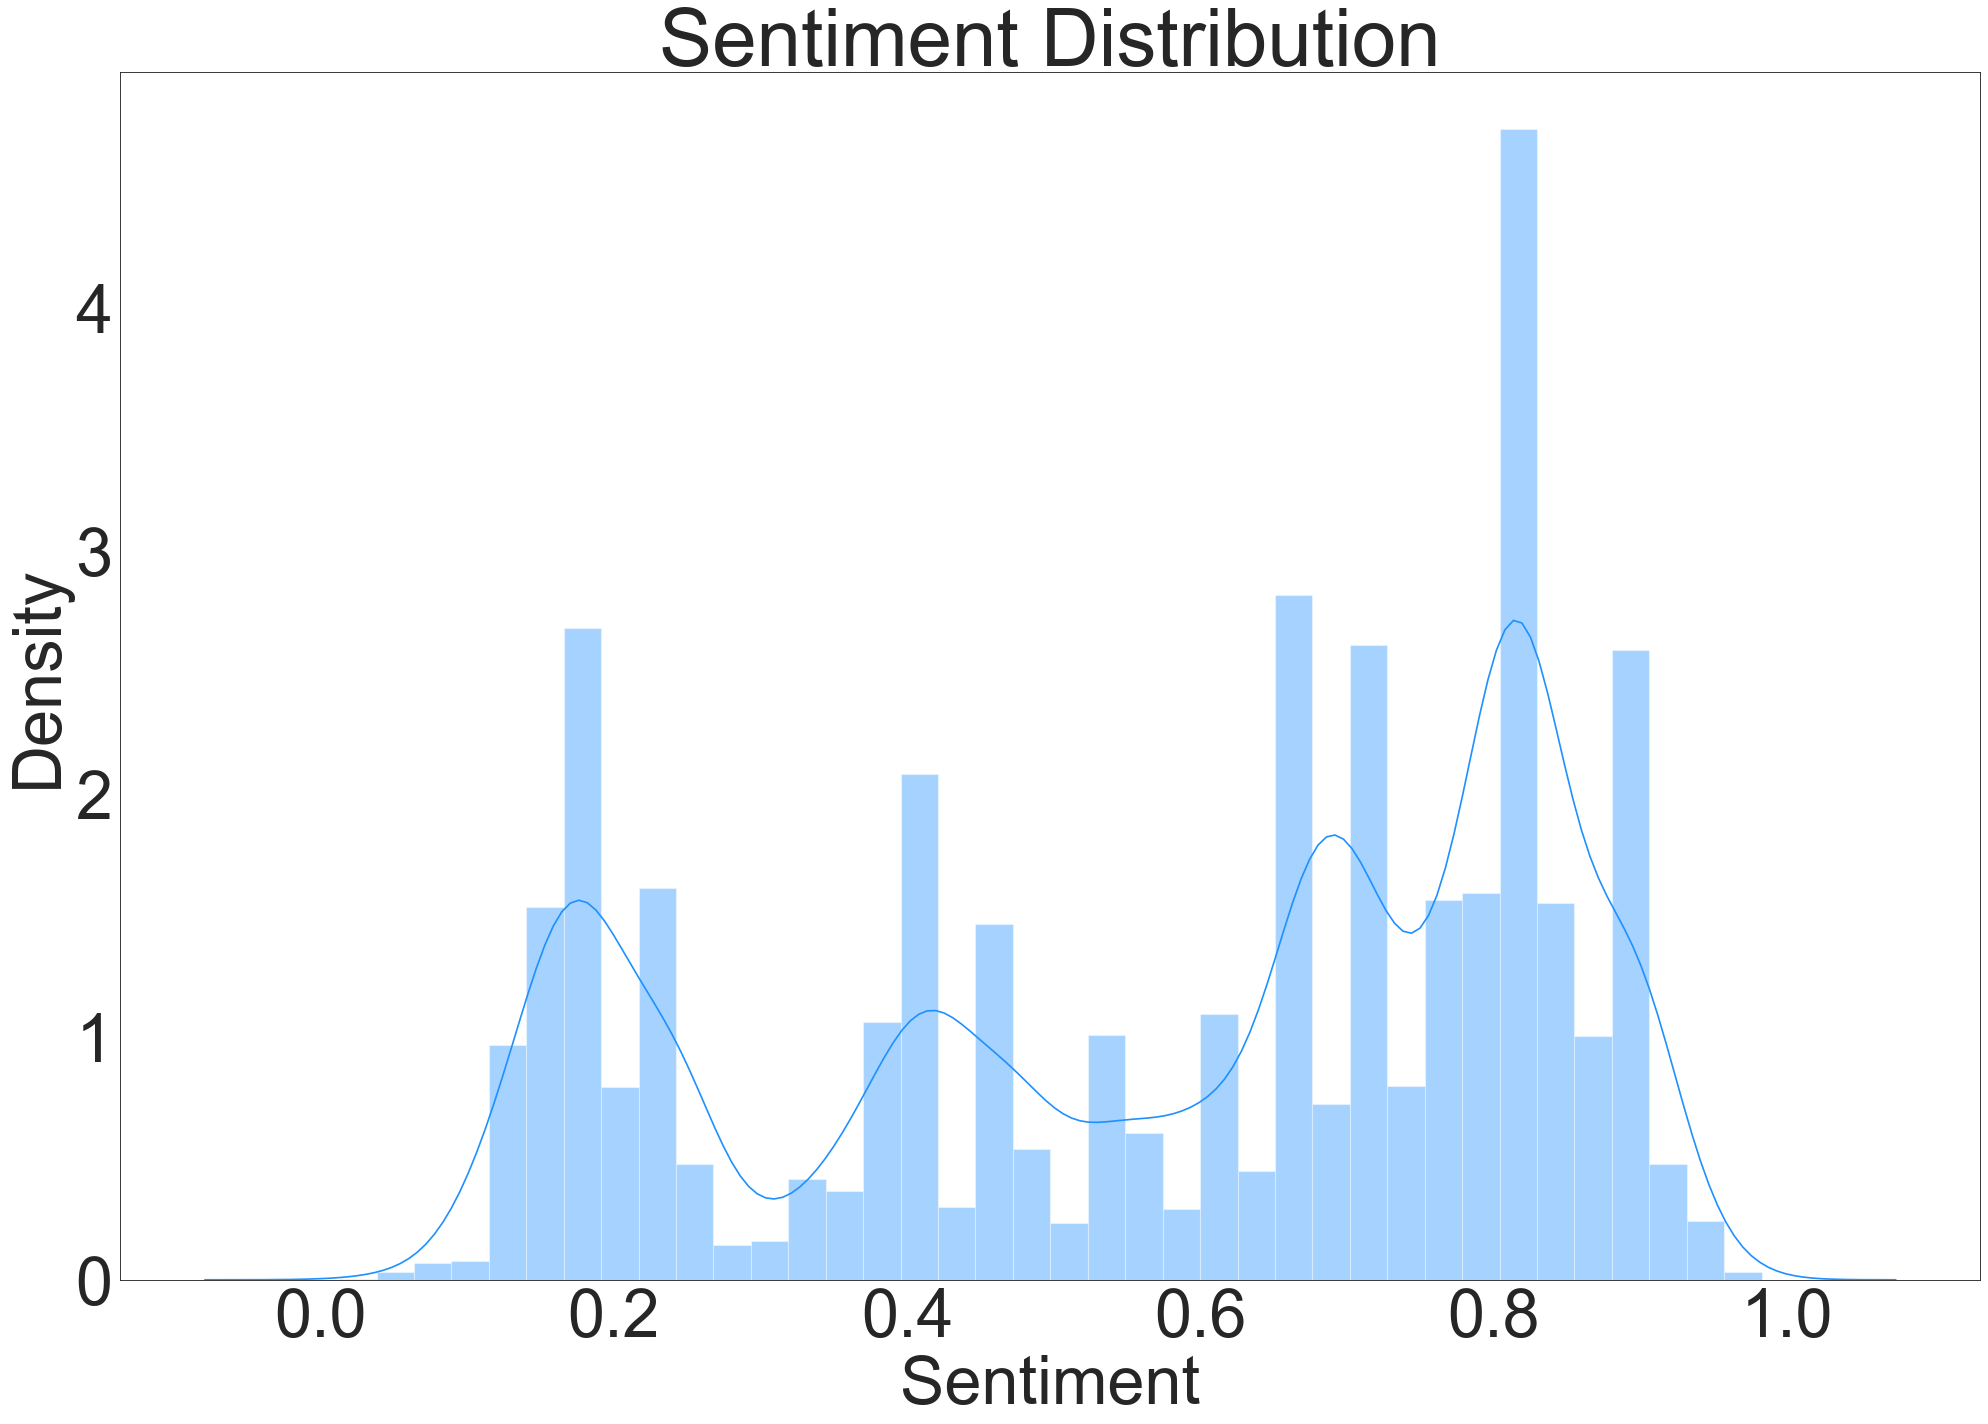

In [51]:
import seaborn as sns
sns.set_style("white")
plt.rcParams.update({'font.size': 60})
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(30,20), dpi= 80)
plt.title("Sentiment Distribution")
sns.distplot(data.sentiment_score, color="dodgerblue", label="Human")
plt.ylabel("Density")
plt.xlabel("Sentiment")
plt.savefig("Sentiment Trend Line.pdf")

In [6]:
data["hashtags"] = data["hashtags"].str.lower()

withPutin = data[data["hashtags"].str.contains("istandwithputin")|data["hashtags"].str.contains("istandwithrussia")]
fuckPutin = data[data["hashtags"].str.contains("fuckputin")]
withUkraine = data[data["hashtags"].str.contains("istandwithukraine")]

/var/folders/5z/grtlhm895dlg4ny4x5ywk27w0000gn/T/ipykernel_4046/3305629176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["hashtags"] = data["hashtags"].str.lower()


In [7]:
withPutin.reset_index(inplace=True)
withPutin

,index,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
0,0,CrowYusuf,2022-03-08 23:55:57+00:00,0,und,"['istandwithputin', 'istandwithrussia']",0.834725,Positive,bot
1,1,CrowYusuf,2022-03-08 23:23:55+00:00,0,en,"['istandwithputin', 'istandwithrussia']",0.824678,Positive,bot
2,2,CrowYusuf,2022-03-07 23:47:57+00:00,0,und,"['fjb', 'letsgobrandon', 'istandwithputin', 'i...",0.799398,Positive,bot
3,3,CrowYusuf,2022-03-05 18:02:23+00:00,0,und,"['istandwithputin', 'istandwithrussia', 'fuckn...",0.834725,Positive,bot
4,4,CrowYusuf,2022-03-04 02:10:54+00:00,0,und,"['fuckglobalism', 'istandwithputin', 'iostocon...",0.799398,Positive,bot
...,...,...,...,...,...,...,...,...,...
157047,224633,DoumDoum19,2022-03-01 16:53:13+00:00,PACMAN88459731,en,"['istandwithputin', 'olosho', 'evenputin']",0.801925,Positive,NaN
157048,224634,XtasyRehman,2022-03-01 16:53:00+00:00,89corrado,en,['istandwithrussia'],0.260121,Negative,NaN
157049,224635,BinduHamal3,2022-03-01 16:51:11+00:00,0,und,['istandwithputin'],0.672338,Positive,NaN
157050,224636,RomeoMakgaleme1,2022-03-01 16:44:09+00:00,PrinceChiczo,en,"['ukraine', 'istandwithputin', 'istandwithruss...",0.744688,Positive,NaN


In [8]:
fuckPutin.reset_index(inplace=True)
fuckPutin


,index,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
0,3556,parisoxford,2022-03-03 06:48:11+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
1,6525,AnOpChile,2022-03-06 03:57:26+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
2,6659,DanaDallabetta,2022-03-03 06:24:17+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
3,7222,Meidas_Ta2Maven,2022-03-08 04:07:03+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
4,7578,JermarcusRobin1,2022-03-08 01:04:31+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
...,...,...,...,...,...,...,...,...,...
956,147841,hayliemybeloved,2022-03-03 05:56:58+00:00,StreamtheVote,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
957,148138,StreamtheVote,2022-03-03 05:55:03+00:00,0,en,"['ukraine', 'istandwithputin', 'fuckputin']",0.563339,Neutral,bot
958,155165,Svienbjorn,2022-03-03 04:37:54+00:00,0,en,"['putinwarcriminal', 'istandwithputin', 'fuckp...",0.364667,Negative,bot
959,156265,StephenDWhite,2022-03-03 04:21:07+00:00,0,en,"['istandwithputin', 'fuckputin']",0.876818,Positive,bot


In [9]:
withUkraine.reset_index(inplace=True)
withUkraine

,index,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
0,30,WokeStreet,2022-03-08 05:19:20+00:00,0,en,"['russia', 'ukraine', 'kyiv', 'kharkiv', 'puti...",0.829771,Positive,bot
1,408,CryptosMom,2022-03-05 23:21:53+00:00,0,und,"['russian', 'ukraine', 'russophobia', 'russian...",0.842442,Positive,human
2,923,Free_Libyan2022,2022-03-03 13:14:42+00:00,Rushi_davhare,und,"['ukrainerussiawar', 'istandwithputin', 'istan...",0.711955,Positive,human
3,1122,sunseeder,2022-03-08 21:51:39+00:00,0,en,"['jefferyepstein', 'hillaryclinton', 'billgate...",0.846079,Positive,human
4,1123,sunseeder,2022-03-07 00:17:40+00:00,0,en,"['jefferyepstein', 'hillaryclinton', 'billgate...",0.518616,Neutral,human
...,...,...,...,...,...,...,...,...,...
4364,217436,Arasu2021,2022-03-02 05:36:06+00:00,0,en,"['istandwithputin', 'istandwithukraine']",0.699963,Positive,bot
4365,218319,urstruly1984,2022-03-02 05:24:48+00:00,0,en,"['unitedstates', 'putin', 'ukrainerussianwar',...",0.248095,Negative,human
4366,224438,yinzerjay80,2022-03-02 01:23:07+00:00,0,en,"['gopcoup', 'istandwithbiden', 'istandwithputi...",0.410457,Neutral,NaN
4367,224464,HiddenKing18,2022-03-01 23:37:43+00:00,0,en,"['eu', 'russia', 'ukraine', 'nato', 'crimea', ...",0.650271,Positive,NaN


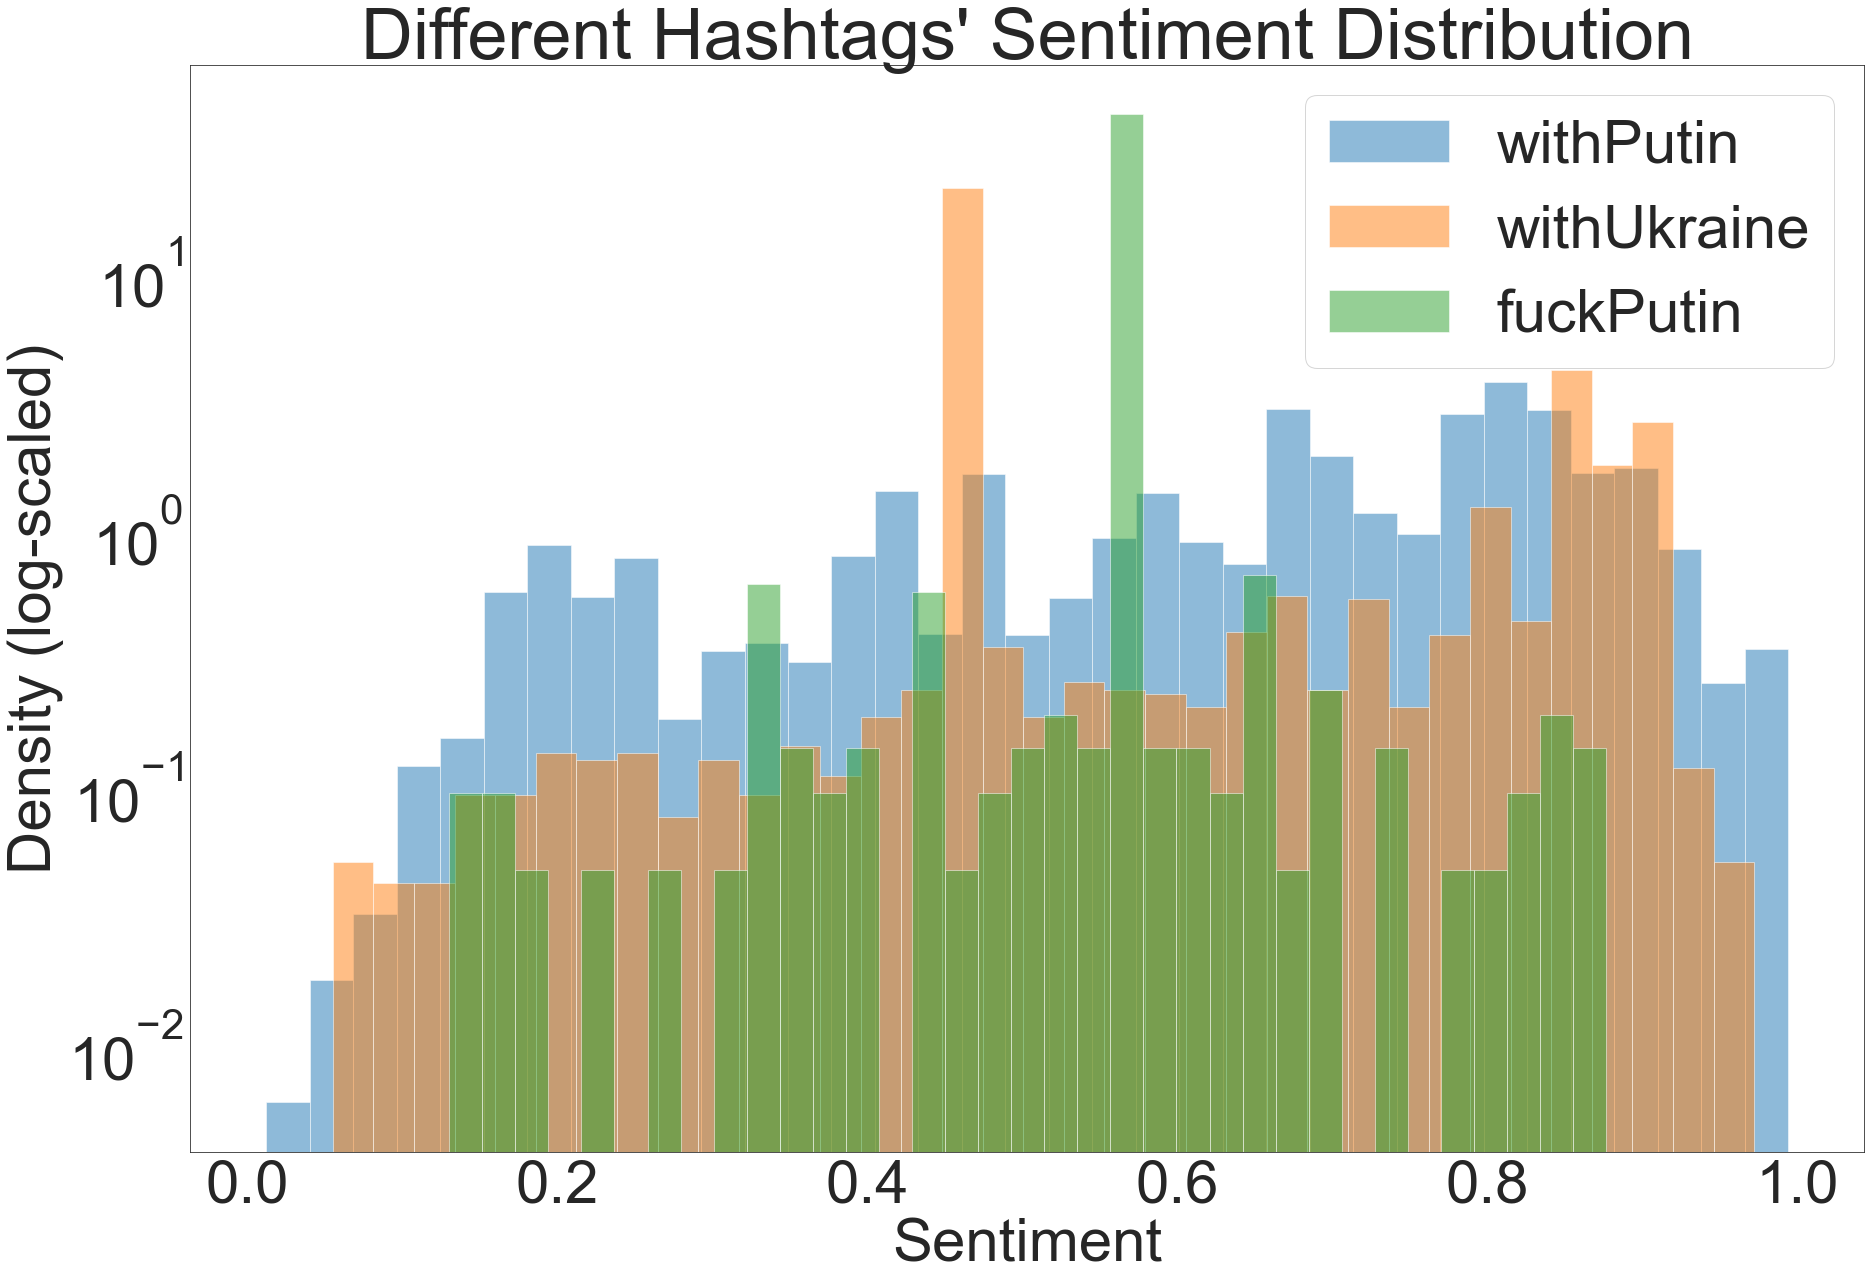

In [10]:
plt.figure(figsize=(30,20))
plt.title("Different Hashtags' Sentiment Distribution",)
plt.hist(withPutin.sentiment_score, alpha=0.5, density=True, bins = 35)
plt.hist(withUkraine.sentiment_score, alpha=0.5, log=True, density=True, bins = 35)
plt.hist(fuckPutin.sentiment_score, alpha=0.5, log=True, density=True, bins = 35)
plt.legend(["withPutin","withUkraine","fuckPutin"])
plt.xlabel("Sentiment")
plt.ylabel("Density (log-scaled)")
plt.savefig('Different Hashtags Sentiment Distribution.pdf', bbox_inches='tight')

In [11]:
data["created_at"] = pd.to_datetime(data["created_at"])

/var/folders/5z/grtlhm895dlg4ny4x5ywk27w0000gn/T/ipykernel_4046/176561988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["created_at"] = pd.to_datetime(data["created_at"])


Text(0, 0.5, 'Sentiment')

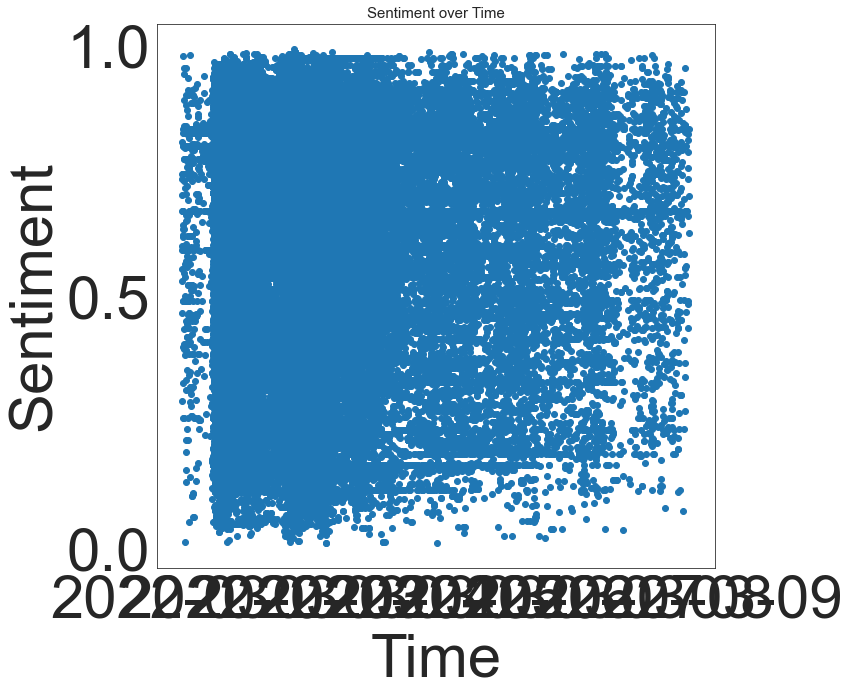

In [12]:
plt.figure(figsize=(10,10))
plt.title("Sentiment over Time", fontsize = 15)
plt.scatter(data.created_at, data.sentiment_score)
plt.xlabel("Time")
plt.ylabel("Sentiment")

In [13]:
data = data.sort_values(by="created_at")
data

,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label
224637,BabingtonCo,2022-03-01 16:40:30+00:00,0,en,"['evil', 'istandwithputin', 'istandwithukraine...",0.703507,Positive,NaN
152489,Aschrafie,2022-03-01 16:41:26+00:00,eleven45pm,en,[],0.593956,Neutral,bot
7325,Aman_SA_,2022-03-01 16:41:32+00:00,0,und,"['usa', 'putin', 'ukrainerussiawar', 'istandwi...",0.735688,Positive,human
56845,LordEnyo,2022-03-01 16:42:08+00:00,0,en,"['fuckputin', 'putinwarcriminal', 'istandwithp...",0.555652,Neutral,bot
3389,hbarjunky,2022-03-01 16:43:28+00:00,0,en,['istandwithputin'],0.468949,Neutral,human
...,...,...,...,...,...,...,...,...
24,TinaSmi43212544,2022-03-08 23:37:44+00:00,HllaNoweir,en,"['istandwithputin', 'istandwithrussia']",0.661864,Positive,bot
13,life_canbeshort,2022-03-08 23:37:49+00:00,0,en,"['russia', 'usa', 'ukraine', 'nato', 'istandwi...",0.491681,Neutral,human
8,RustyWallace_,2022-03-08 23:41:43+00:00,0,en,['istandwithputin'],0.627001,Positive,bot
6,JacquieWells4,2022-03-08 23:50:04+00:00,BigBlueWaveUSA,en,['istandwithputin'],0.700887,Positive,bot


In [14]:
data["day"] = data["created_at"].apply(lambda x: x.day)
data

,author_id,created_at,in_reply_to_user_id,lang,hashtags,sentiment_score,sentiment,label,day
224637,BabingtonCo,2022-03-01 16:40:30+00:00,0,en,"['evil', 'istandwithputin', 'istandwithukraine...",0.703507,Positive,NaN,1
152489,Aschrafie,2022-03-01 16:41:26+00:00,eleven45pm,en,[],0.593956,Neutral,bot,1
7325,Aman_SA_,2022-03-01 16:41:32+00:00,0,und,"['usa', 'putin', 'ukrainerussiawar', 'istandwi...",0.735688,Positive,human,1
56845,LordEnyo,2022-03-01 16:42:08+00:00,0,en,"['fuckputin', 'putinwarcriminal', 'istandwithp...",0.555652,Neutral,bot,1
3389,hbarjunky,2022-03-01 16:43:28+00:00,0,en,['istandwithputin'],0.468949,Neutral,human,1
...,...,...,...,...,...,...,...,...,...
24,TinaSmi43212544,2022-03-08 23:37:44+00:00,HllaNoweir,en,"['istandwithputin', 'istandwithrussia']",0.661864,Positive,bot,8
13,life_canbeshort,2022-03-08 23:37:49+00:00,0,en,"['russia', 'usa', 'ukraine', 'nato', 'istandwi...",0.491681,Neutral,human,8
8,RustyWallace_,2022-03-08 23:41:43+00:00,0,en,['istandwithputin'],0.627001,Positive,bot,8
6,JacquieWells4,2022-03-08 23:50:04+00:00,BigBlueWaveUSA,en,['istandwithputin'],0.700887,Positive,bot,8


In [15]:
sent_time = data.groupby("day")["sentiment_score"].mean().to_frame()
sent_time.reset_index(inplace=True)
sent_time.columns = ["day","sentiment"]
sent_time

,day,sentiment
0,1,0.631666
1,2,0.578685
2,3,0.606473
3,4,0.574760
4,5,0.559459
5,6,0.594202
6,7,0.600421
7,8,0.636346


Text(0, 0.5, 'Average Sentiment')

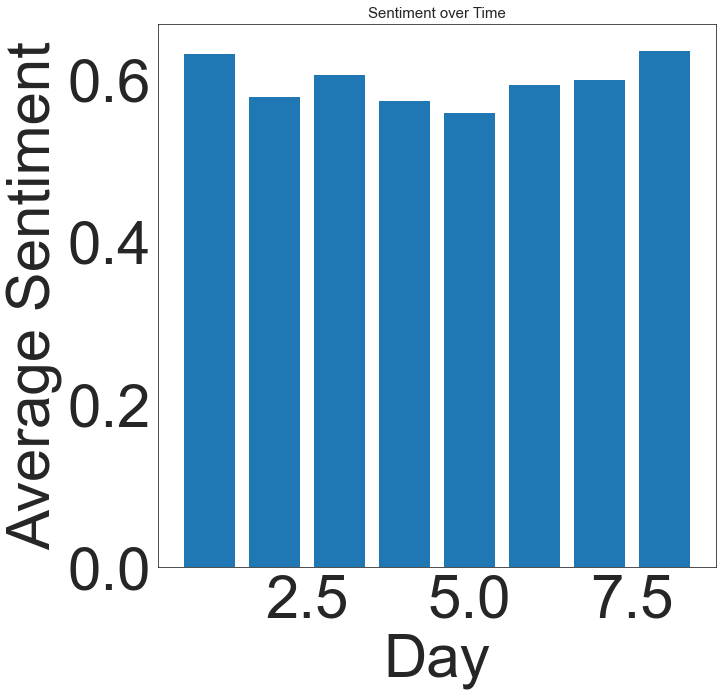

In [16]:
plt.figure(figsize=(10,10))
plt.title("Sentiment over Time", fontsize = 15)
plt.bar(sent_time.day, sent_time.sentiment)
plt.xlabel("Day")
plt.ylabel("Average Sentiment")

In [17]:
data["hashtags"] = data["hashtags"].str.lower()

withPutin = data[data["hashtags"].str.contains("istandwithputin")|data["hashtags"].str.contains("istandwithrussia")]
fuckPutin = data[data["hashtags"].str.contains("fuckputin")]
withUkraine = data[data["hashtags"].str.contains("istandwithukraine")]

In [18]:
Putin_sent_time = withPutin.groupby("day")["sentiment_score"].mean().to_frame()
Putin_sent_time.reset_index(inplace=True)
Putin_sent_time.columns = ["day","sentiment"]
Putin_sent_time

,day,sentiment
0,1,0.679692
1,2,0.636859
2,3,0.666383
3,4,0.666807
4,5,0.633232
5,6,0.635891
6,7,0.646855
7,8,0.667554


Text(0, 0.5, 'Average Sentiment')

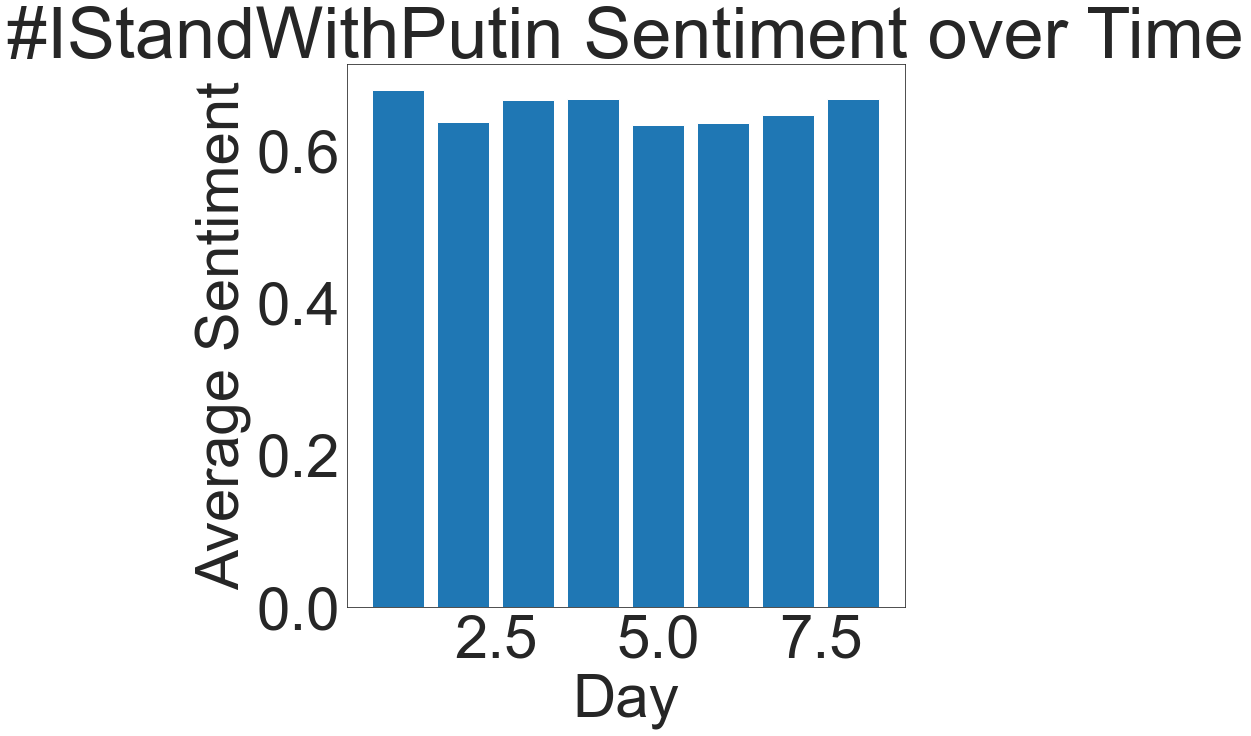

In [19]:
plt.figure(figsize=(10,10))
plt.title("#IStandWithPutin Sentiment over Time")
plt.bar(Putin_sent_time.day, Putin_sent_time.sentiment)
plt.xlabel("Day")
plt.ylabel("Average Sentiment")

In [20]:
Ukraine_sent_time = withUkraine.groupby("day")["sentiment_score"].mean().to_frame()
Ukraine_sent_time.reset_index(inplace=True)
Ukraine_sent_time.columns = ["day","sentiment"]
Ukraine_sent_time

,day,sentiment
0,1,0.676889
1,2,0.646879
2,3,0.558946
3,4,0.756371
4,5,0.655162
5,6,0.697406
6,7,0.675641
7,8,0.662369


Text(0, 0.5, 'Average Sentiment')

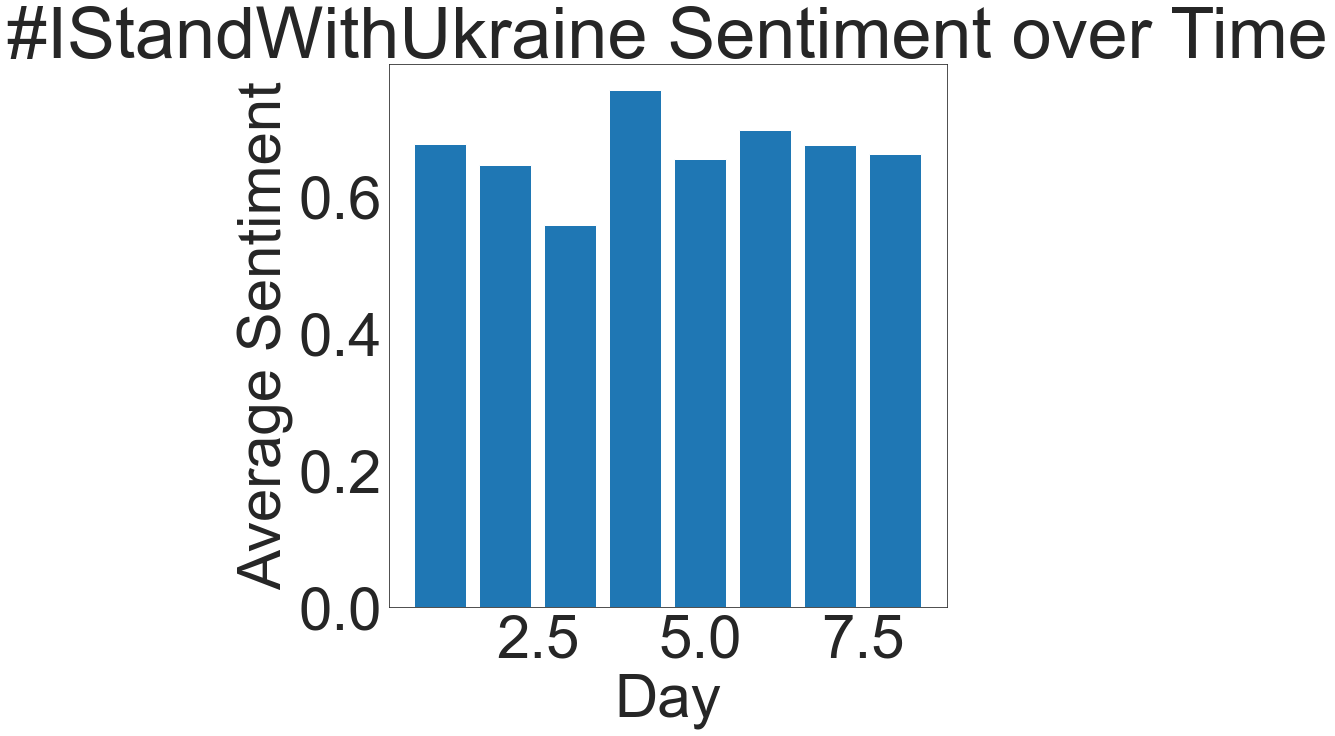

In [21]:
plt.figure(figsize=(10,10))
plt.title("#IStandWithUkraine Sentiment over Time")
plt.bar(Ukraine_sent_time.day, Ukraine_sent_time.sentiment)
plt.xlabel("Day")
plt.ylabel("Average Sentiment")

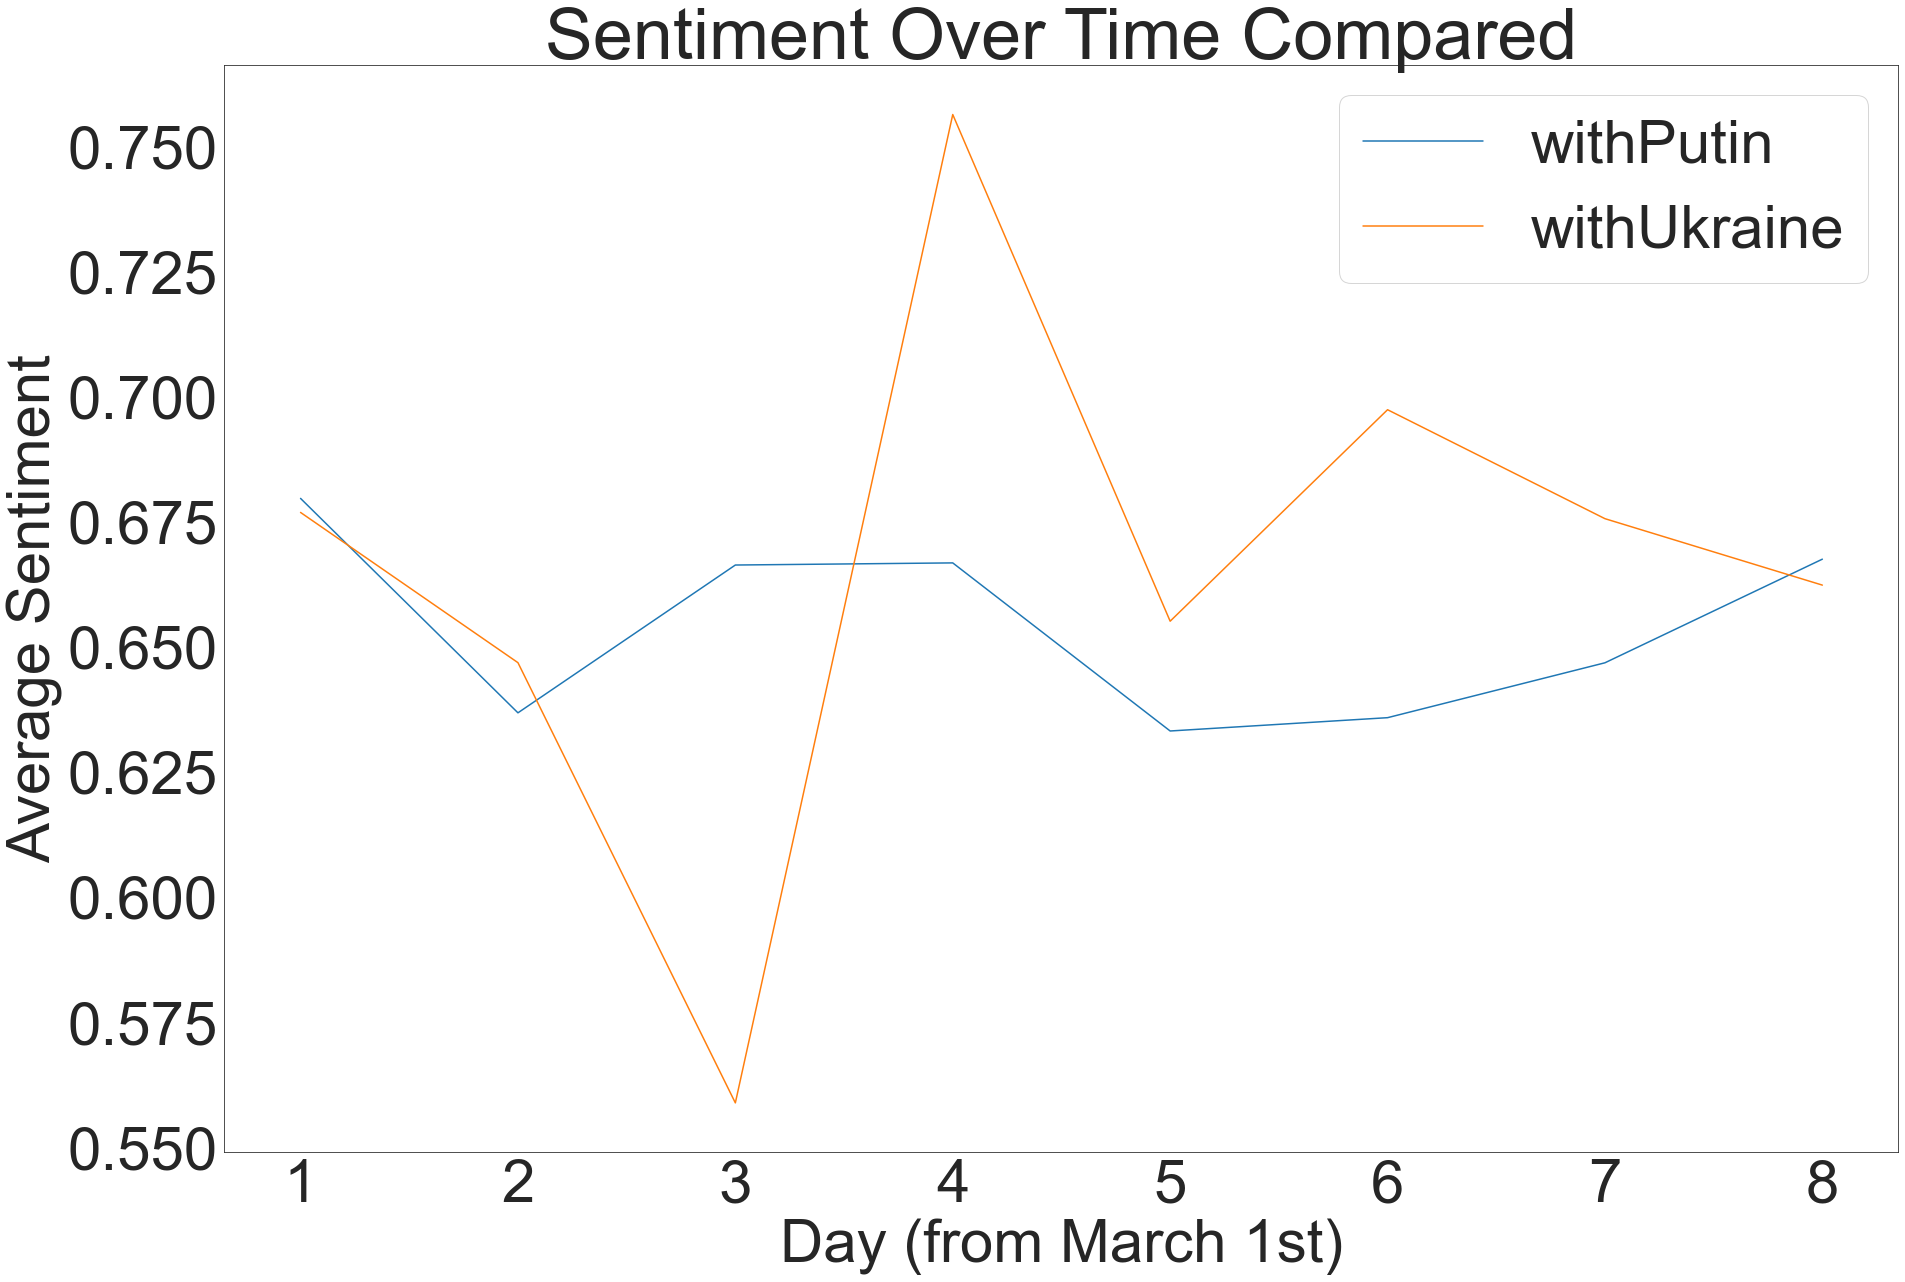

In [22]:
plt.figure(figsize=(30,20))
plt.title("Sentiment Over Time Compared")
plt.plot(Putin_sent_time.day, Putin_sent_time.sentiment)
plt.plot(Ukraine_sent_time.day, Ukraine_sent_time.sentiment)
plt.legend(["withPutin","withUkraine"])
plt.xlabel("Day (from March 1st)")
plt.ylabel("Average Sentiment")
plt.savefig('Sentiment Over Time Compared.pdf', bbox_inches='tight')

In [23]:
data = data.head(40000)

data['author_id'] = data['author_id'].astype('string')
data['in_reply_to_user_id'] = data['in_reply_to_user_id'].astype('string')
data['in_reply_to_user_id'] = data['in_reply_to_user_id'].fillna("0")


/var/folders/5z/grtlhm895dlg4ny4x5ywk27w0000gn/T/ipykernel_4046/616487223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['author_id'] = data['author_id'].astype('string')
/var/folders/5z/grtlhm895dlg4ny4x5ywk27w0000gn/T/ipykernel_4046/616487223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_reply_to_user_id'] = data['in_reply_to_user_id'].astype('string')
/var/folders/5z/grtlhm895dlg4ny4x5ywk27w0000gn/T/ipykernel_4046/616487223.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [24]:
# pyvis_nt = Network('1000px', '1000px', directed=True)
# count = 0
# for index, row in data.iterrows():
#     pyvis_nt.add_node(row["author_id"])
#     if row["in_reply_to_user_id"] != "0":
#         pyvis_nt.add_node(row["in_reply_to_user_id"])
#         if row["sentiment"] == "Positive":
#             pyvis_nt.add_edge(row["author_id"], row["in_reply_to_user_id"], color="green", width=4)
#         elif row["sentiment"] == "Neutral":
#             pyvis_nt.add_edge(row["author_id"], row["in_reply_to_user_id"], color="black", width=1)
#         else:
#             pyvis_nt.add_edge(row["author_id"], row["in_reply_to_user_id"], color="red", width=6)


In [25]:
# pyvis_nt.toggle_physics(True)
# pyvis_nt.show_buttons()
# # pyvis_nt.set_edge_smooth('dynamic')
# pyvis_nt.show('pyvis.html')

In [26]:
final = file.copy()
final=final.sort_values(['author_id','created_at'],ascending=True)
final

,Unnamed: 0,author_id,created_at,in_reply_to_user_id,lang,retweet_count_x,like_count_x,source,text,hashtags,...,outDegree,degree,sentiment_y,tweet_similarity,lexical_diversity,hashtags_count_y,user_mentions_count_y,retweet_count_y,like_count_y,label
152095,152095,000000o0oo0,2022-03-03 05:17:57+00:00,Pakistan07777,en,0,0,Twitter for Android,RT @Pakistan07777: Trump admitting they are ki...,"['Russia', 'RussiaUkraine', 'RussianUkrainianW...",...,2,2,0.719140,0.5,96.153846,2.000000,1.0,0.0,0.0,human
152094,152094,000000o0oo0,2022-03-03 05:20:10+00:00,godschildgroup,en,0,0,Twitter for Android,RT @godschildgroup: @UNCENUSA Tata spoke witho...,[],...,2,2,0.719140,0.5,96.153846,2.000000,1.0,0.0,0.0,human
66335,66335,00000d0,2022-03-02 18:40:14+00:00,rjsh003,en,0,0,Twitter for Android,RT @rjsh003: When the US do the same in the Mi...,[],...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
66334,66334,00000d0,2022-03-02 18:40:24+00:00,trulydipesh,en,0,0,Twitter for Android,RT @trulydipesh: Count me in. #IStandWithPutin...,"['IStandWithPutin', 'IStandWithRussia']",...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
66333,66333,00000d0,2022-03-02 18:45:09+00:00,Indddy77,en,0,0,Twitter for Android,RT @Indddy77: I stand with Russia \n#IStandWit...,['IStandWithPutin'],...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102499,102499,zzxxu1,2022-03-03 05:09:48+00:00,Greater_Pak11,en,0,0,Twitter for Android,RT @Greater_Pak11: #RussianUkrainianWar\nUSA i...,['RussianUkrainianWar'],...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102498,102498,zzxxu1,2022-03-03 05:14:50+00:00,Inamcoded,en,0,0,Twitter for Android,RT @Inamcoded: This Man is the real heroe. Lik...,"['RussiaUkraine', 'IStandWithPutin']",...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102497,102497,zzxxu1,2022-03-03 12:59:09+00:00,SaquibSayyed18,en,0,0,Twitter for Android,RT @SaquibSayyed18: If u support Ukraine 🇺🇦 Bu...,[],...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102496,102496,zzxxu1,2022-03-03 13:05:46+00:00,Basheerahmed321,en,0,0,Twitter for Android,RT @Basheerahmed321: Double standard hypocrisy...,"['terrorism', 'RussianUkrainianWar', 'IStandWi...",...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot


In [27]:
final["label"].value_counts()

bot      189878
human     34508
Name: label, dtype: int64

In [28]:
tweet_no = final["author_id"].value_counts().to_frame()
tweet_no.reset_index(inplace=True)
tweet_no.columns = ["author_id","tweet_count"]
plot = tweet_no.merge(final[["author_id","label","created_at"]], on="author_id", how="left")
plot

,author_id,tweet_count,label,created_at
0,PardipK23979889,655,bot,2022-03-02 05:02:12+00:00
1,PardipK23979889,655,bot,2022-03-02 05:03:35+00:00
2,PardipK23979889,655,bot,2022-03-02 05:03:38+00:00
3,PardipK23979889,655,bot,2022-03-02 05:04:29+00:00
4,PardipK23979889,655,bot,2022-03-02 05:04:46+00:00
...,...,...,...,...
224633,MISERICORDIAE__,1,bot,2022-03-03 10:30:06+00:00
224634,Unclebiotics,1,bot,2022-03-03 05:55:11+00:00
224635,lzyltnin,1,bot,2022-03-03 20:39:00+00:00
224636,Rerxxy,1,human,2022-03-03 10:09:40+00:00


In [29]:
from datetime import datetime
# plot["created_at"] = pd.to_datetime(plot["created_at"])
plot['created_at']=plot['created_at'].apply(lambda x: datetime.fromisoformat(x).timestamp())
plot = plot.sort_values(by="created_at")

In [30]:
hum = plot[plot.label=='human']
hum

,author_id,tweet_count,label,created_at
62625,Aman_SA_,14,human,1.646153e+09
10066,hbarjunky,177,human,1.646153e+09
10067,hbarjunky,177,human,1.646153e+09
1705,Free_Libyan2022,436,human,1.646153e+09
1706,Free_Libyan2022,436,human,1.646153e+09
...,...,...,...,...
21718,CryptosMom,68,human,1.646782e+09
3654,onelilsZ,363,human,1.646782e+09
3655,onelilsZ,363,human,1.646782e+09
126012,thebae_renee,3,human,1.646783e+09


In [31]:
bo = plot[plot.label=='bot']
bo

,author_id,tweet_count,label,created_at
70456,Aschrafie,12,bot,1.646153e+09
142015,LordEnyo,2,bot,1.646153e+09
70457,Aschrafie,12,bot,1.646153e+09
106127,Manos415,5,bot,1.646153e+09
94513,shakazulu0000,7,bot,1.646154e+09
...,...,...,...,...
129063,WokeStreet,3,bot,1.646783e+09
157110,TinaSmi43212544,2,bot,1.646783e+09
106731,RustyWallace_,5,bot,1.646783e+09
154124,JacquieWells4,2,bot,1.646783e+09


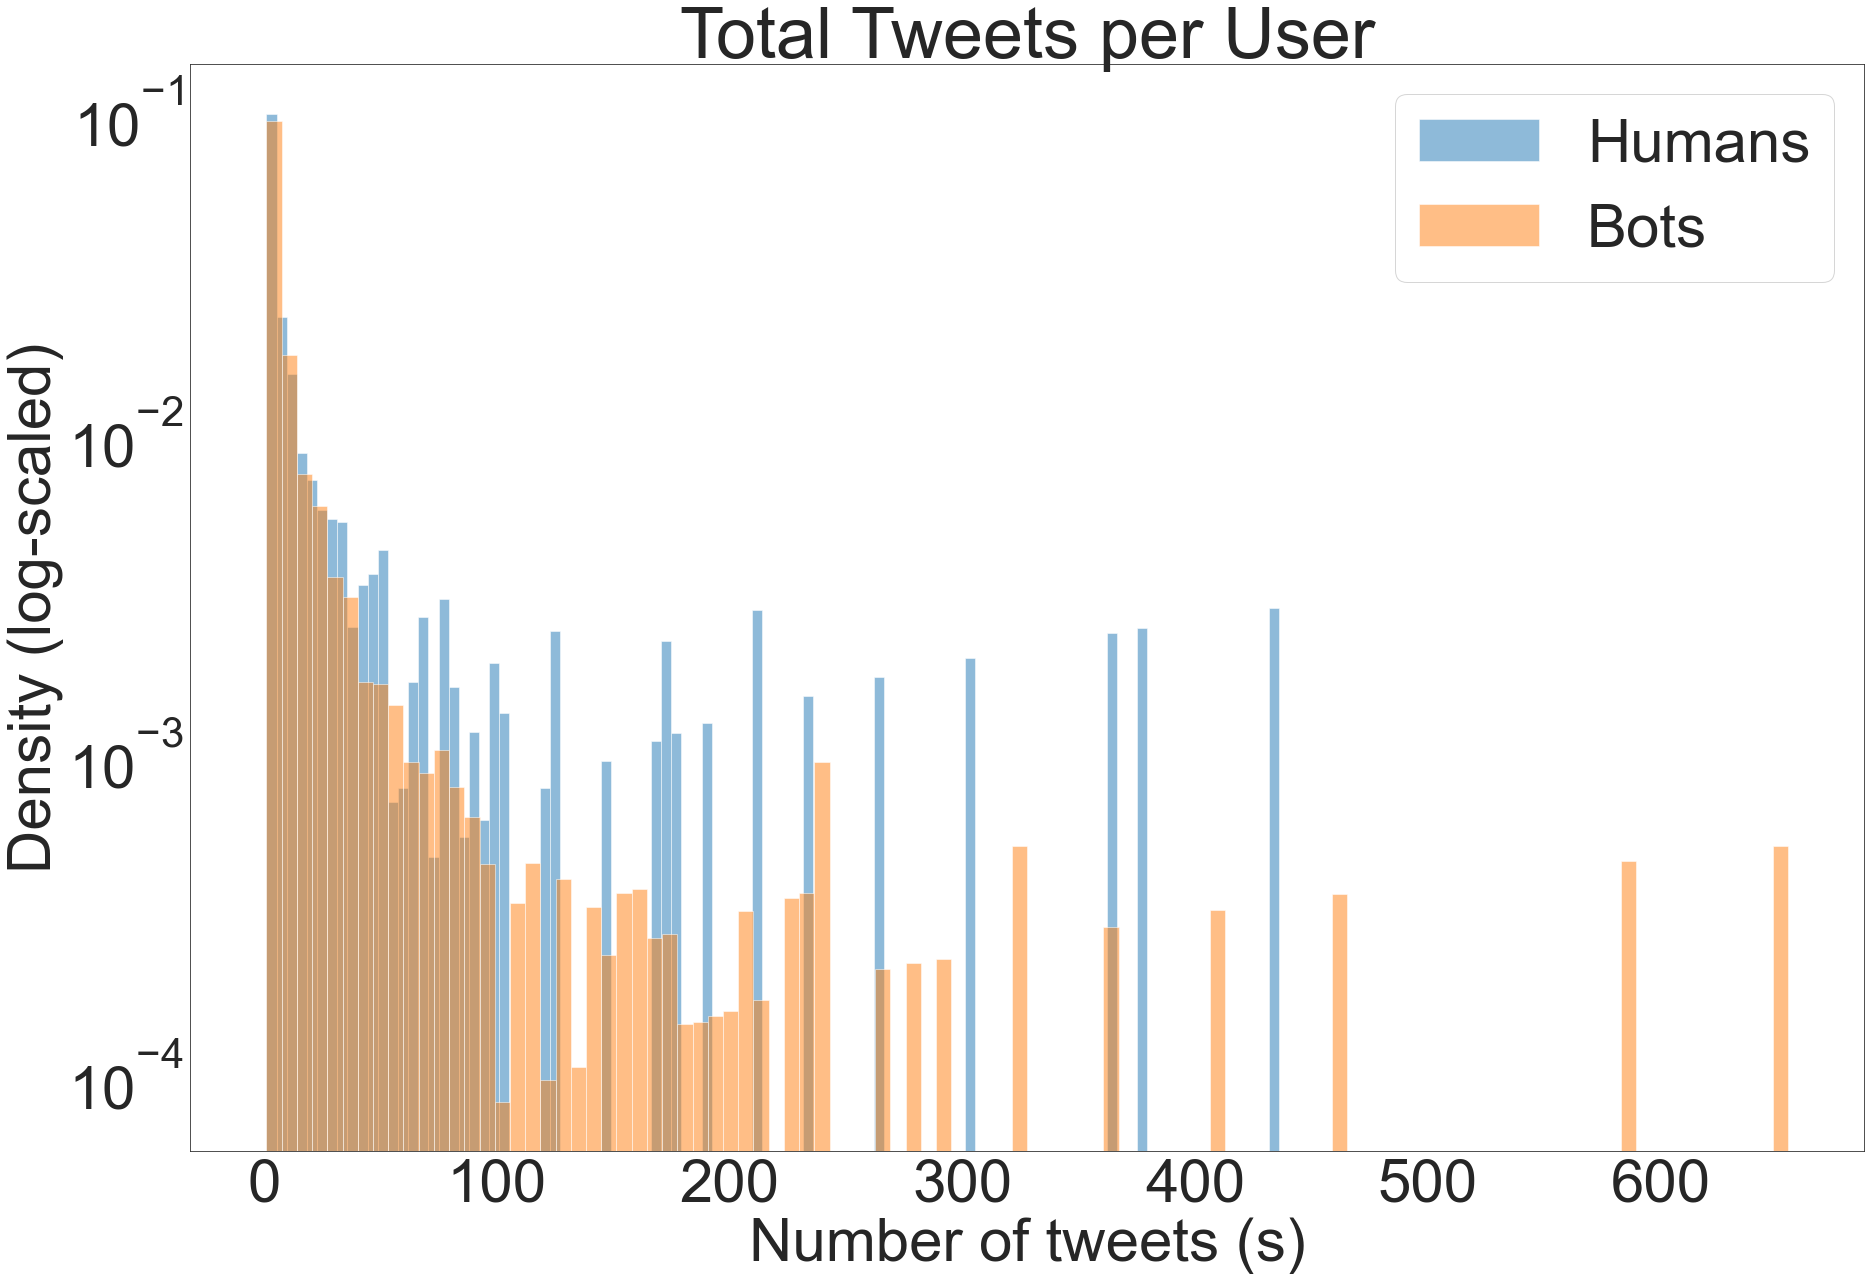

In [32]:
plt.figure(figsize=[30,20])
plt.title("Total Tweets per User")
plt.hist(hum['tweet_count'], density=True,alpha = 0.5,bins=100,log=True)
plt.hist(bo['tweet_count'], density=True, alpha = 0.5,bins=100,log=True)
plt.legend(["Humans","Bots"])
plt.xlabel("Number of tweets (s)")
plt.ylabel("Density (log-scaled)")

plt.savefig('Number of Tweets per User.pdf', bbox_inches='tight')

In [33]:
hum2=hum.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(10)
hum2['t_between_tweets'] =  hum2["created_at"] - hum2['created_at'].shift()
hum2 = hum2.sort_values(['author_id','created_at'])
hum2['match'] = hum2.author_id.eq(hum2.author_id.shift())
hum2.loc[hum2['match'] ==False , 't_between_tweets'] = None
hum2

,author_id,tweet_count,label,created_at,t_between_tweets,match
149791,000000o0oo0,2,human,1.646285e+09,NaN,False
149792,000000o0oo0,2,human,1.646285e+09,133.0,True
205402,000Nancy000,1,human,1.646668e+09,NaN,False
222829,0013Satya,1,human,1.646201e+09,NaN,False
122424,001Koos,4,human,1.646280e+09,NaN,False
...,...,...,...,...,...,...
208056,zuberansari9951,1,human,1.646209e+09,NaN,False
188449,zubydester,1,human,1.646281e+09,NaN,False
213803,zuwairaa_aliyu,1,human,1.646533e+09,NaN,False
212200,zz51029193,1,human,1.646320e+09,NaN,False


In [34]:
bo2=bo.sort_values(['author_id','created_at'],ascending=True).groupby('author_id').head(10)
bo2['t_between_tweets'] =  bo2["created_at"] - bo2['created_at'].shift()
bo2 = bo2.sort_values(['author_id','created_at'])
bo2['match'] = bo2.author_id.eq(bo2.author_id.shift())
bo2.loc[bo2['match'] ==False , 't_between_tweets'] = None
bo2

,author_id,tweet_count,label,created_at,t_between_tweets,match
65365,00000d0,13,bot,1.646246e+09,NaN,False
65366,00000d0,13,bot,1.646246e+09,10.0,True
65367,00000d0,13,bot,1.646247e+09,285.0,True
65368,00000d0,13,bot,1.646247e+09,41.0,True
65369,00000d0,13,bot,1.646247e+09,54.0,True
...,...,...,...,...,...,...
78288,zzxxu1,10,bot,1.646284e+09,34.0,True
78289,zzxxu1,10,bot,1.646284e+09,302.0,True
78290,zzxxu1,10,bot,1.646312e+09,27859.0,True
78291,zzxxu1,10,bot,1.646313e+09,397.0,True


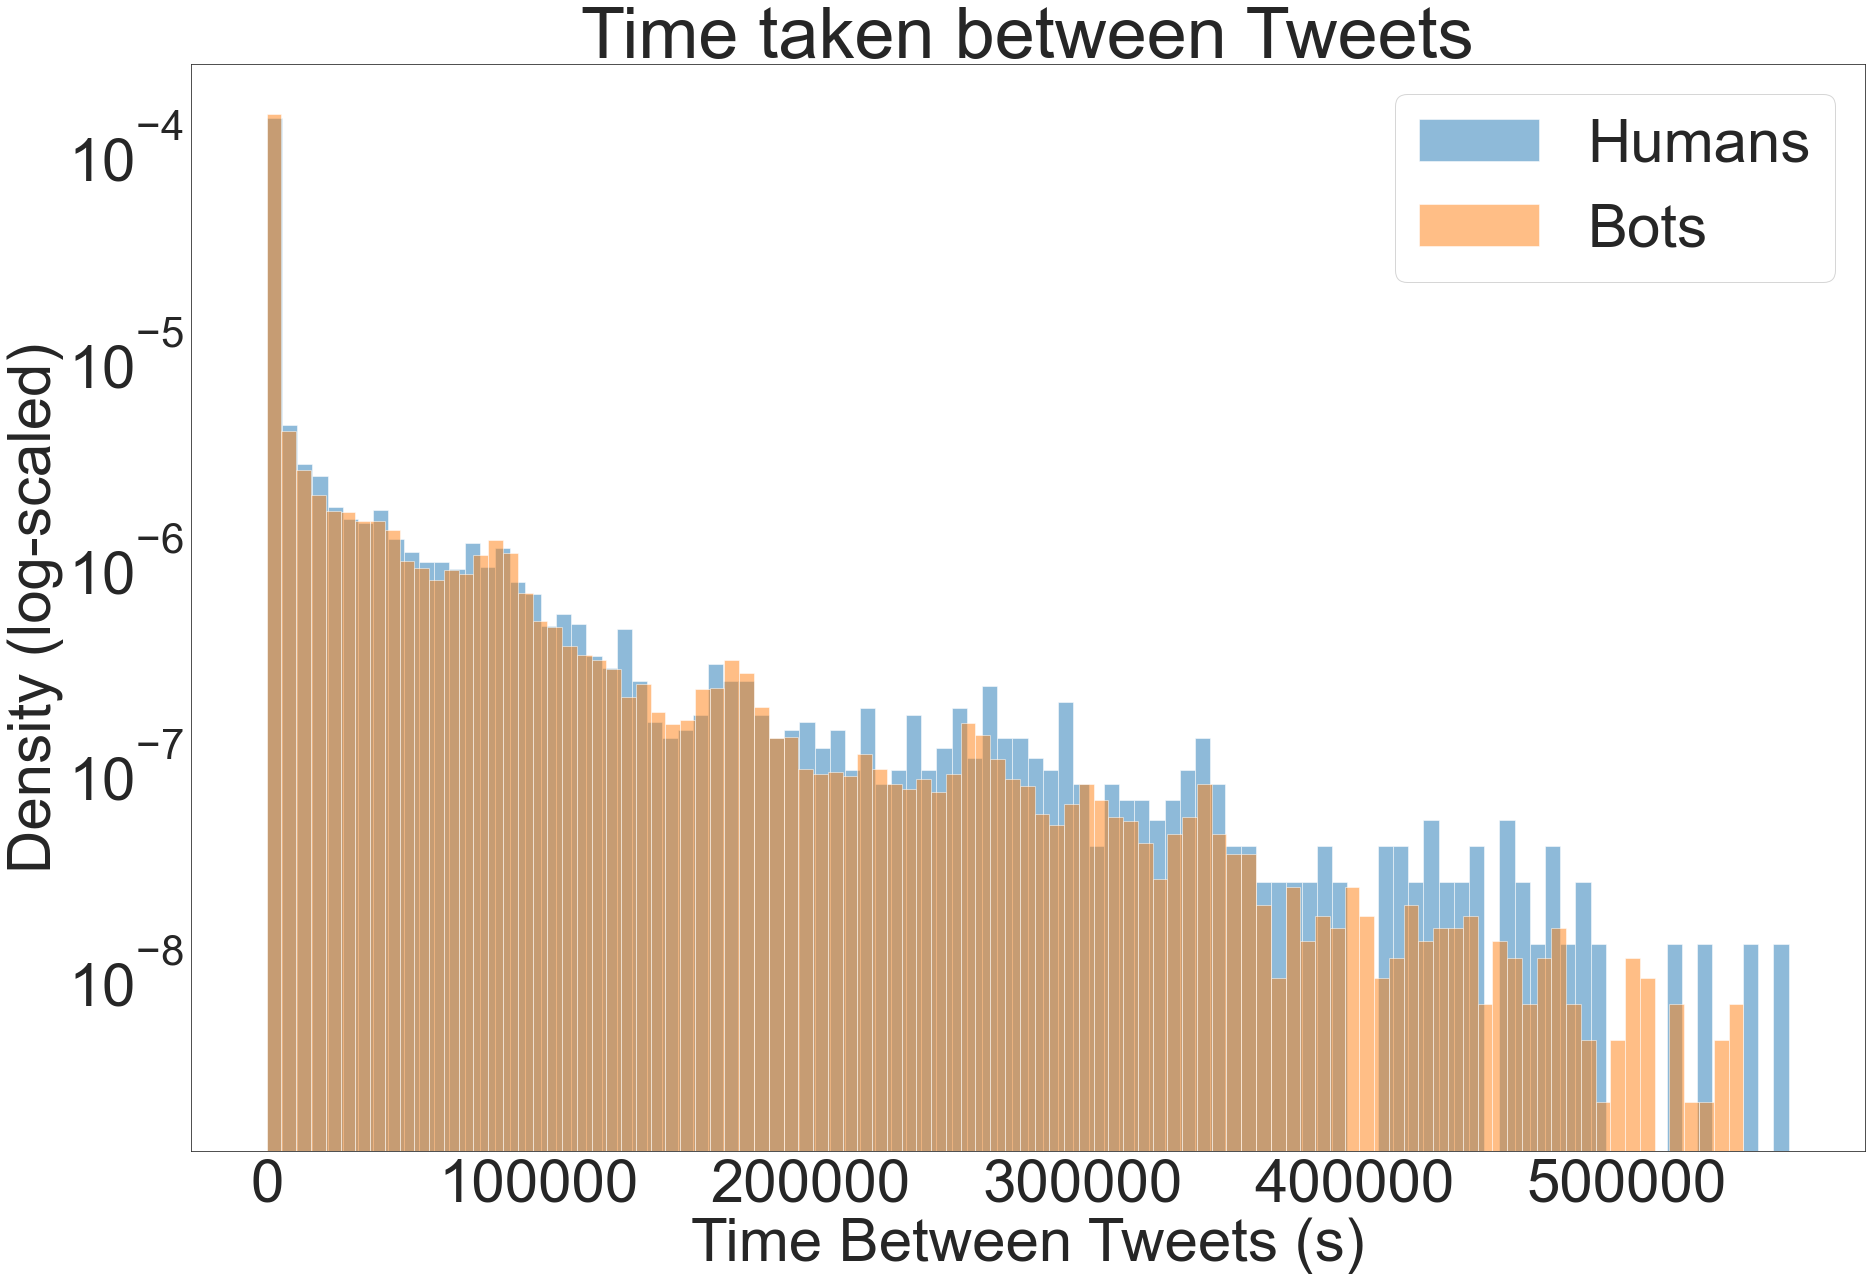

In [35]:
plt.figure(figsize=[30,20])

plt.title("Time taken between Tweets")
plt.hist(hum2['t_between_tweets'], density=True, log=True, alpha = 0.5,bins=100)
plt.hist(bo2['t_between_tweets'], density=True, log=True, alpha = 0.5,bins=100)
plt.ylabel("Density (log-scaled)")
plt.xlabel("Time Between Tweets (s)")
plt.legend(["Humans","Bots"])

plt.savefig('Time between Tweets.pdf',bbox_inches='tight')

In [36]:
dfH = final[final.label=='human']
dfB = final[final.label=='bot']
dfH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34508 entries, 152095 to 180687
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             34508 non-null  int64  
 1   author_id              34508 non-null  object 
 2   created_at             34508 non-null  object 
 3   in_reply_to_user_id    34508 non-null  object 
 4   lang                   34508 non-null  object 
 5   retweet_count_x        34508 non-null  int64  
 6   like_count_x           34508 non-null  int64  
 7   source                 34508 non-null  object 
 8   text                   34508 non-null  object 
 9   hashtags               34508 non-null  object 
 10  user_mentions          34508 non-null  object 
 11  hashtags_count_x       34508 non-null  int64  
 12  user_mentions_count_x  34508 non-null  int64  
 13  sentiment_score        34508 non-null  float64
 14  sentiment_x            34508 non-null  object 
 

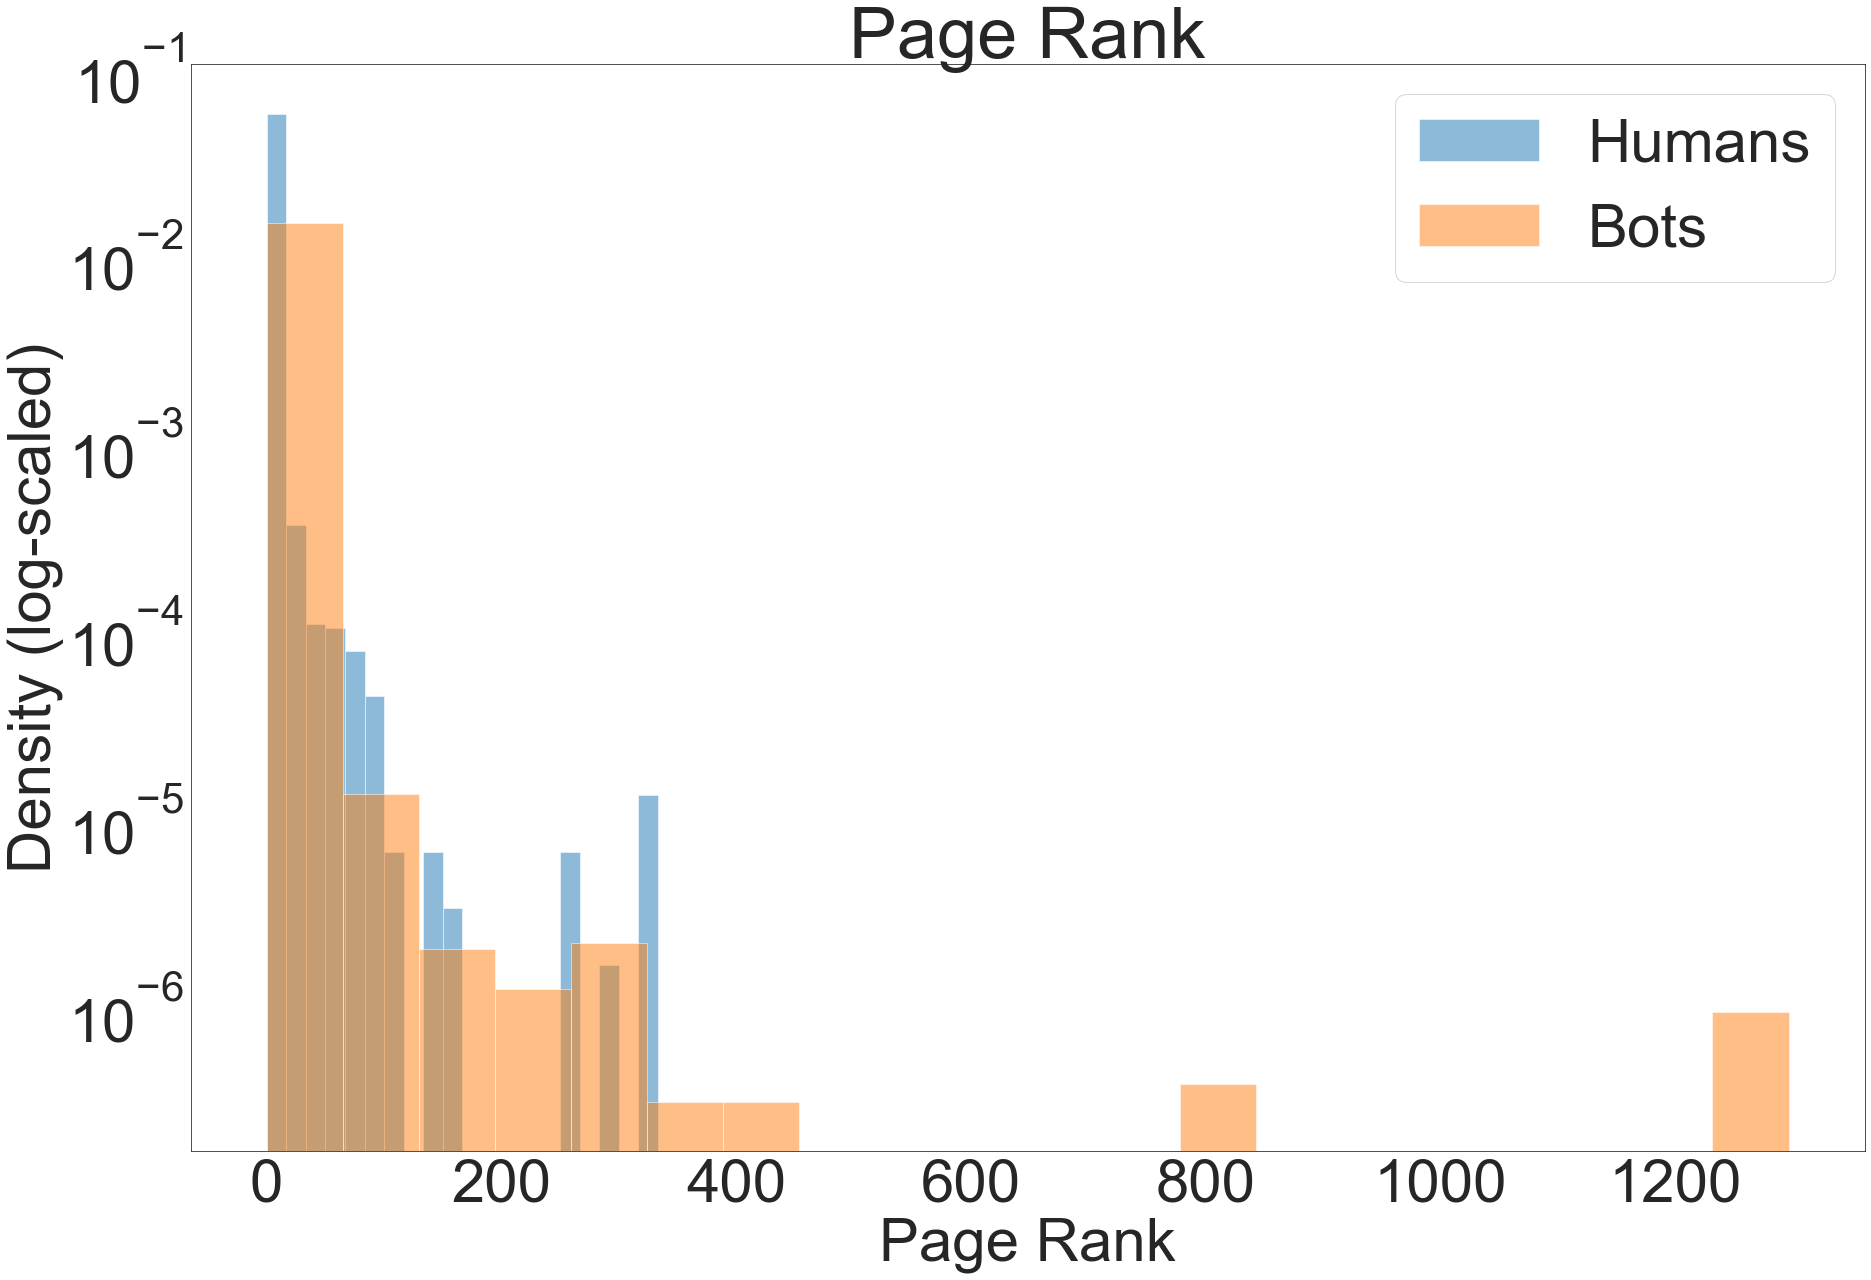

In [37]:
plt.figure(figsize=[30,20])
plt.title("Page Rank")
plt.hist(dfH['prlabel'], density=True,alpha = 0.5,bins=20, log =True)
plt.hist(dfB['prlabel'],density=True,alpha = 0.5,bins=20, log =True)
plt.ylabel("Density (log-scaled)")
plt.xlabel("Page Rank")
plt.legend(["Humans","Bots"])

plt.savefig('PageRank.pdf', bbox_inches='tight')

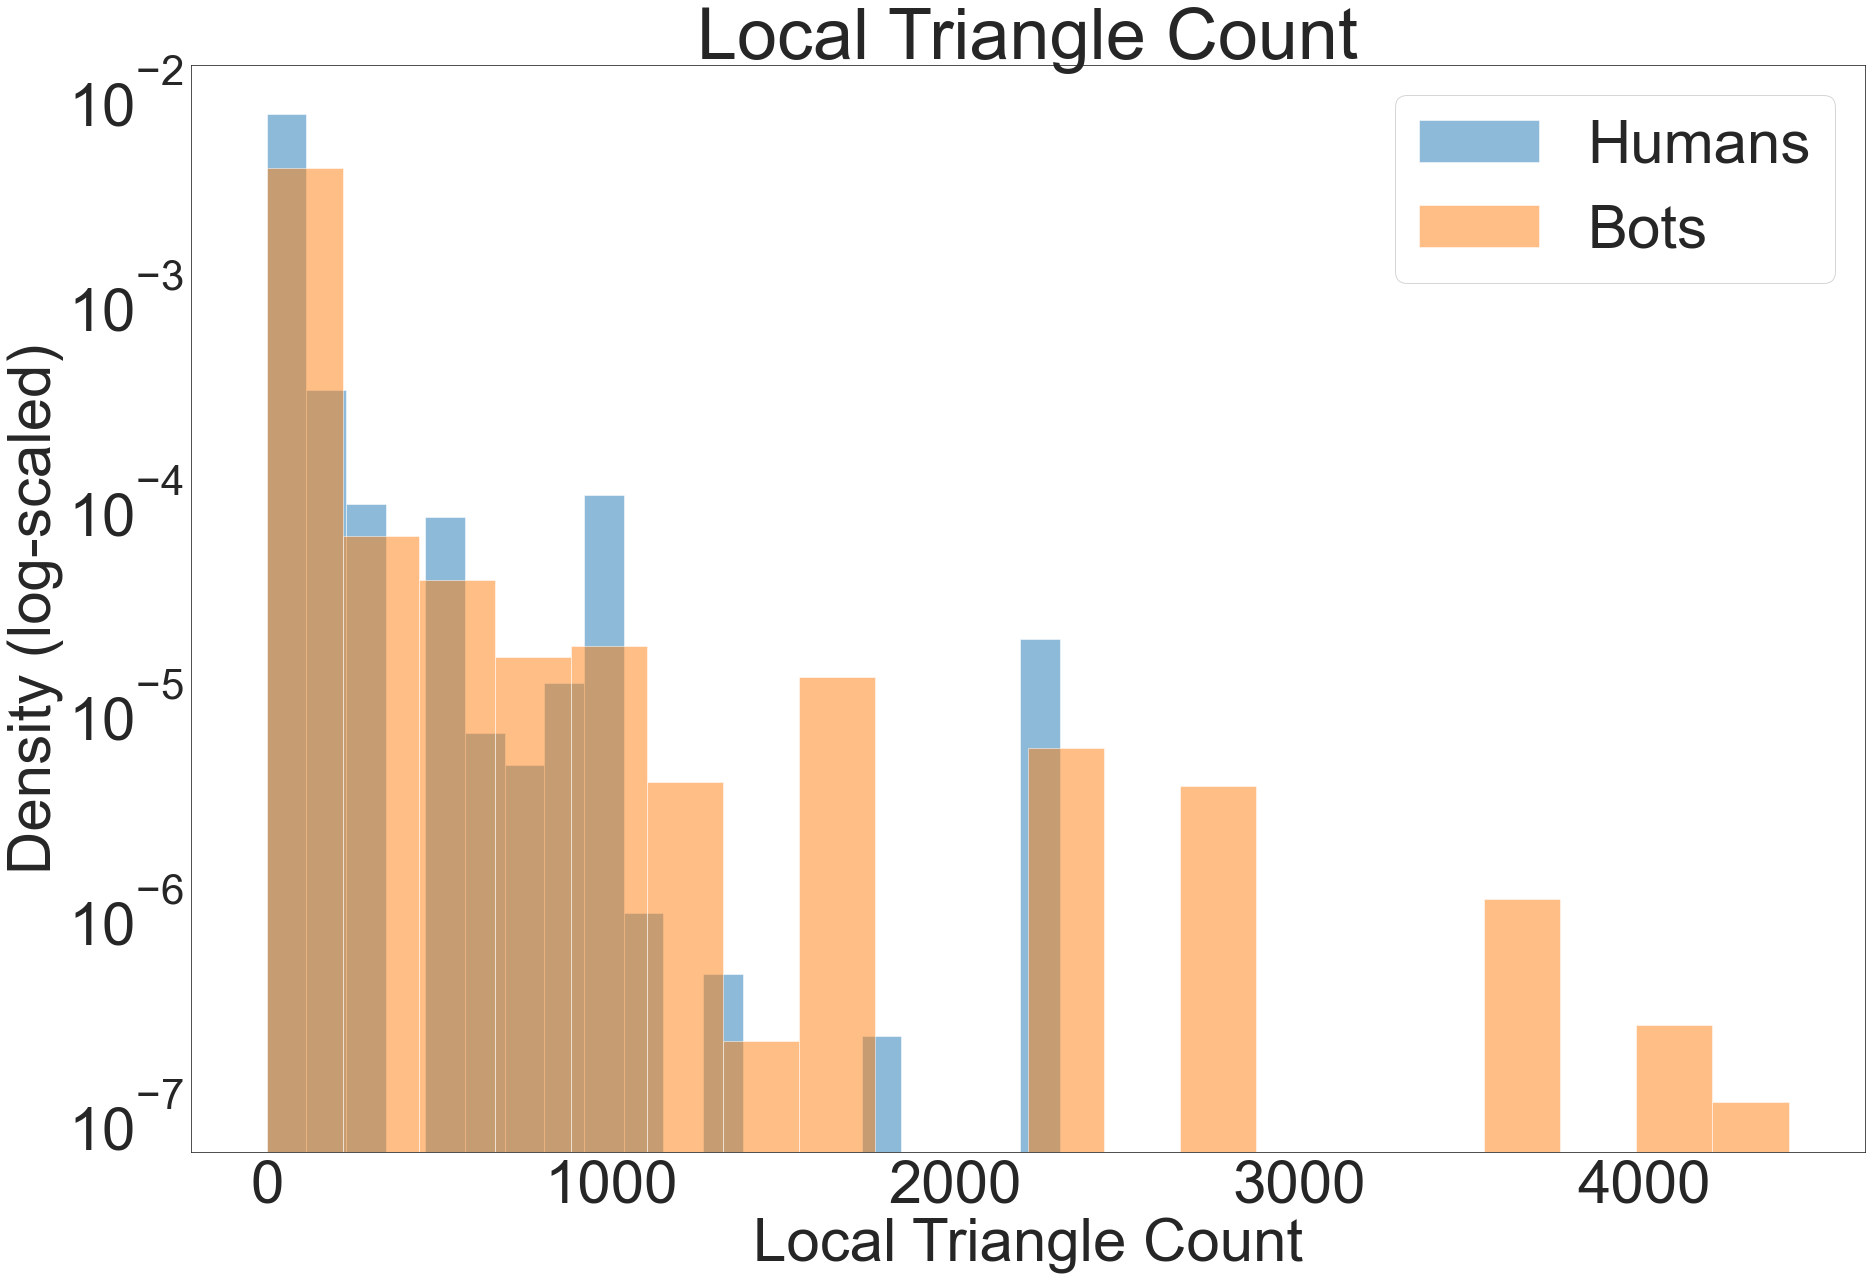

In [53]:
plt.figure(figsize=[30,20])
plt.title("Local Triangle Count")
plt.hist(dfH['triangleCount'], density=True,alpha = 0.5,bins=20, log=True)
plt.hist(dfB['triangleCount'], density=True,alpha = 0.5,bins=20, log=True)
plt.ylabel("Density (log-scaled)")
plt.xlabel("Local Triangle Count")
plt.legend(["Humans","Bots"])

plt.savefig('Triangle Count.pdf', bbox_inches='tight')

In [39]:
# final = final.sort_values(by="created_at")
# graph = final.head(5000)

# pyvis_nt2 = Network('1000px', '1000px', directed=True)
# for index, row in graph.iterrows():
#     if row["label"] == "bot":
#         pyvis_nt2.add_node(row["author_id"], color="black")
#     elif row["label"] == "human":
#         pyvis_nt2.add_node(row["author_id"], color="blue")
#     else:
#         pyvis_nt2.add_node(row["author_id"])
#     if row["in_reply_to_user_id"] != "0":
#         pyvis_nt2.add_node(row["in_reply_to_user_id"])
#         if row["sentiment_x"] == "Positive":
#             pyvis_nt2.add_edge(row["author_id"], row["in_reply_to_user_id"], color="green")
#         elif row["sentiment_x"] == "Neutral":
#             pyvis_nt2.add_edge(row["author_id"], row["in_reply_to_user_id"], color="black")
#         else:
#             pyvis_nt2.add_edge(row["author_id"], row["in_reply_to_user_id"], color="red")


In [40]:
# pyvis_nt2.toggle_physics(True)
# pyvis_nt2.show_buttons()
# # pyvis_nt.set_edge_smooth('dynamic')
# pyvis_nt2.show('pyvis2.html')

In [41]:
final

,Unnamed: 0,author_id,created_at,in_reply_to_user_id,lang,retweet_count_x,like_count_x,source,text,hashtags,...,outDegree,degree,sentiment_y,tweet_similarity,lexical_diversity,hashtags_count_y,user_mentions_count_y,retweet_count_y,like_count_y,label
152095,152095,000000o0oo0,2022-03-03 05:17:57+00:00,Pakistan07777,en,0,0,Twitter for Android,RT @Pakistan07777: Trump admitting they are ki...,"['Russia', 'RussiaUkraine', 'RussianUkrainianW...",...,2,2,0.719140,0.5,96.153846,2.000000,1.0,0.0,0.0,human
152094,152094,000000o0oo0,2022-03-03 05:20:10+00:00,godschildgroup,en,0,0,Twitter for Android,RT @godschildgroup: @UNCENUSA Tata spoke witho...,[],...,2,2,0.719140,0.5,96.153846,2.000000,1.0,0.0,0.0,human
66335,66335,00000d0,2022-03-02 18:40:14+00:00,rjsh003,en,0,0,Twitter for Android,RT @rjsh003: When the US do the same in the Mi...,[],...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
66334,66334,00000d0,2022-03-02 18:40:24+00:00,trulydipesh,en,0,0,Twitter for Android,RT @trulydipesh: Count me in. #IStandWithPutin...,"['IStandWithPutin', 'IStandWithRussia']",...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
66333,66333,00000d0,2022-03-02 18:45:09+00:00,Indddy77,en,0,0,Twitter for Android,RT @Indddy77: I stand with Russia \n#IStandWit...,['IStandWithPutin'],...,12,12,0.546697,6.0,92.256739,1.769231,1.0,0.0,0.0,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102499,102499,zzxxu1,2022-03-03 05:09:48+00:00,Greater_Pak11,en,0,0,Twitter for Android,RT @Greater_Pak11: #RussianUkrainianWar\nUSA i...,['RussianUkrainianWar'],...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102498,102498,zzxxu1,2022-03-03 05:14:50+00:00,Inamcoded,en,0,0,Twitter for Android,RT @Inamcoded: This Man is the real heroe. Lik...,"['RussiaUkraine', 'IStandWithPutin']",...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102497,102497,zzxxu1,2022-03-03 12:59:09+00:00,SaquibSayyed18,en,0,0,Twitter for Android,RT @SaquibSayyed18: If u support Ukraine 🇺🇦 Bu...,[],...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot
102496,102496,zzxxu1,2022-03-03 13:05:46+00:00,Basheerahmed321,en,0,0,Twitter for Android,RT @Basheerahmed321: Double standard hypocrisy...,"['terrorism', 'RussianUkrainianWar', 'IStandWi...",...,10,10,0.516958,4.5,94.461538,0.900000,1.0,0.0,0.0,bot


In [42]:
test = final[["author_id", "in_reply_to_user_id", "created_at","text","sentiment_x","label"]].copy()

In [43]:
test

,author_id,in_reply_to_user_id,created_at,text,sentiment_x,label
152095,000000o0oo0,Pakistan07777,2022-03-03 05:17:57+00:00,RT @Pakistan07777: Trump admitting they are ki...,Positive,human
152094,000000o0oo0,godschildgroup,2022-03-03 05:20:10+00:00,RT @godschildgroup: @UNCENUSA Tata spoke witho...,Positive,human
66335,00000d0,rjsh003,2022-03-02 18:40:14+00:00,RT @rjsh003: When the US do the same in the Mi...,Negative,bot
66334,00000d0,trulydipesh,2022-03-02 18:40:24+00:00,RT @trulydipesh: Count me in. #IStandWithPutin...,Positive,bot
66333,00000d0,Indddy77,2022-03-02 18:45:09+00:00,RT @Indddy77: I stand with Russia \n#IStandWit...,Positive,bot
...,...,...,...,...,...,...
102499,zzxxu1,Greater_Pak11,2022-03-03 05:09:48+00:00,RT @Greater_Pak11: #RussianUkrainianWar\nUSA i...,Neutral,bot
102498,zzxxu1,Inamcoded,2022-03-03 05:14:50+00:00,RT @Inamcoded: This Man is the real heroe. Lik...,Positive,bot
102497,zzxxu1,SaquibSayyed18,2022-03-03 12:59:09+00:00,RT @SaquibSayyed18: If u support Ukraine 🇺🇦 Bu...,Negative,bot
102496,zzxxu1,Basheerahmed321,2022-03-03 13:05:46+00:00,RT @Basheerahmed321: Double standard hypocrisy...,Neutral,bot


In [44]:
test.nunique()

author_id               87641
in_reply_to_user_id      7393
created_at             129722
text                    50259
sentiment_x                 3
label                       2
dtype: int64

In [45]:
duplicateRows = test[test.duplicated(["text", "in_reply_to_user_id"])]
duplicateRows

,author_id,in_reply_to_user_id,created_at,text,sentiment_x,label
215498,0013Satya,Sunny_Rajput87,2022-03-02 05:57:38+00:00,RT @Sunny_Rajput87: I support Russia #IStandWi...,Positive,human
142518,007_jsam,Pakistan07777,2022-03-03 06:23:07+00:00,RT @Pakistan07777: Trump admitting they are ki...,Positive,bot
63977,007_thamilan,Indddy77,2022-03-03 22:06:24+00:00,RT @Indddy77: I stand with Russia \n#IStandWit...,Positive,bot
110760,00Crypt00,_omarnasr,2022-03-03 11:22:04+00:00,RT @_omarnasr: 🐑 Only believe the west media! ...,Positive,bot
34869,00TheRebel00,Sunny_Rajput87,2022-03-02 05:29:16+00:00,RT @Sunny_Rajput87: I support Russia #IStandWi...,Positive,bot
...,...,...,...,...,...,...
102499,zzxxu1,Greater_Pak11,2022-03-03 05:09:48+00:00,RT @Greater_Pak11: #RussianUkrainianWar\nUSA i...,Neutral,bot
102498,zzxxu1,Inamcoded,2022-03-03 05:14:50+00:00,RT @Inamcoded: This Man is the real heroe. Lik...,Positive,bot
102497,zzxxu1,SaquibSayyed18,2022-03-03 12:59:09+00:00,RT @SaquibSayyed18: If u support Ukraine 🇺🇦 Bu...,Negative,bot
102496,zzxxu1,Basheerahmed321,2022-03-03 13:05:46+00:00,RT @Basheerahmed321: Double standard hypocrisy...,Neutral,bot


In [46]:
princeChiczo = final[final["author_id"]=="PrinceChiczo"]
rTPC = final[final["in_reply_to_user_id"]=="PrinceChiczo"]
princeChiczo.iloc[0,8]

'RT @PrinceChiczo: Truth be told Russia is a threat to the Western Elites\n\nWestern #IStandWithPutin #istandwithrussia #Ukraine #StandWithRus…'

In [47]:
rTPC

,Unnamed: 0,author_id,created_at,in_reply_to_user_id,lang,retweet_count_x,like_count_x,source,text,hashtags,...,outDegree,degree,sentiment_y,tweet_similarity,lexical_diversity,hashtags_count_y,user_mentions_count_y,retweet_count_y,like_count_y,label
224170,224170,Aditya_1950,2022-03-02 03:33:49+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,10,10,0.544317,4.5,95.357143,1.300000,1.000000,0.000000,0.000000,human
177236,177236,AkiyoruTsuBasa,2022-03-02 17:00:57+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,1,1,0.744688,0.0,78.571429,3.000000,1.000000,0.000000,0.000000,bot
24027,24027,AlineInti,2022-03-06 00:35:22+00:00,PrinceChiczo,en,0,0,Twitter Web App,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,1,1,0.744688,0.0,78.571429,3.000000,1.000000,0.000000,0.000000,bot
58304,58304,AshishThanapat2,2022-03-02 03:35:08+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,208,208,0.623826,120.0,91.326371,1.394191,1.286307,0.000000,0.004149,bot
86776,86776,Atishra61017417,2022-03-02 05:27:15+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,48,48,0.565892,24.5,91.225697,1.300000,1.000000,0.000000,0.000000,bot
60037,60037,Chankya16517155,2022-03-02 05:33:45+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,149,149,0.606781,83.5,90.952505,1.148810,1.041667,0.000000,0.000000,bot
224355,224355,DEEPAKK47006345,2022-03-02 03:22:21+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,3,3,0.652294,1.0,92.857143,2.000000,1.000000,0.000000,0.000000,human
224431,224431,Faith21972393,2022-03-02 01:52:27+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,1,1,0.744688,0.0,78.571429,3.000000,1.000000,0.000000,0.000000,NaN
208260,208260,Himansh92600668,2022-03-02 07:26:13+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,214,214,0.609726,118.0,91.387009,1.270042,1.046414,0.000000,0.000000,bot
216097,216097,JAATGAM09062646,2022-03-02 05:49:32+00:00,PrinceChiczo,en,0,0,Twitter for Android,RT @PrinceChiczo: Truth be told Russia is a th...,"['Ukraine', 'IStandWithPutin', 'istandwithruss...",...,46,46,0.596135,22.5,90.568115,1.239130,1.021739,0.000000,0.000000,bot


In [48]:
noRT = final[final["in_reply_to_user_id"]=="0"]
noRT = noRT[["author_id","text","user_mentions"]]

In [49]:
noRT

,author_id,text,user_mentions
9925,000Nancy000,Fake @Twitter accounts are trying to get #ISta...,['Twitter']
156963,001Koos,the USA lost a lot of credibility with Bush ly...,[]
156962,001Koos,#IStandWithPutin https://t.co/6GZUVqldXO,[]
156961,001Koos,#IStandWithPutin https://t.co/MkQyC1ZC2f,[]
156960,001Koos,#IStandWithPutin https://t.co/jLyRVI8XMR,[]
...,...,...,...
206995,zyeborg94,America put not one two nuclear bombs in Hiros...,[]
152161,zyndev,#IStandWithPutin https://t.co/XIorM93nkE,[]
154447,zywoo61497478,Russian chemist Mendeleyev has been asked by w...,[]
92944,zz51029193,#IStandWithPutin,[]


In [50]:
RT = final[final["in_reply_to_user_id"]!="0"]
RT = RT[["author_id","text","user_mentions"]]
RT

,author_id,text,user_mentions
152095,000000o0oo0,RT @Pakistan07777: Trump admitting they are ki...,['Pakistan07777']
152094,000000o0oo0,RT @godschildgroup: @UNCENUSA Tata spoke witho...,['godschildgroup']
66335,00000d0,RT @rjsh003: When the US do the same in the Mi...,['rjsh003']
66334,00000d0,RT @trulydipesh: Count me in. #IStandWithPutin...,['trulydipesh']
66333,00000d0,RT @Indddy77: I stand with Russia \n#IStandWit...,['Indddy77']
...,...,...,...
102499,zzxxu1,RT @Greater_Pak11: #RussianUkrainianWar\nUSA i...,['Greater_Pak11']
102498,zzxxu1,RT @Inamcoded: This Man is the real heroe. Lik...,['Inamcoded']
102497,zzxxu1,RT @SaquibSayyed18: If u support Ukraine 🇺🇦 Bu...,['SaquibSayyed18']
102496,zzxxu1,RT @Basheerahmed321: Double standard hypocrisy...,['Basheerahmed321']
